In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
##Now i am genrating synthetic data

In [5]:
X_train=np.linspace(-1,1,20)

In [6]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [7]:
X_test = np.linspace(-1, 1, 20)

In [8]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

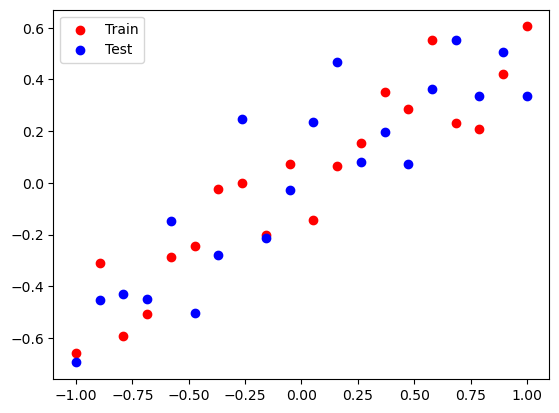

In [9]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [10]:
## Doing regression

In [12]:
model=Sequential()
model.add(Dense(130,input_dim=1,activation="relu"))
model.add(Dense(130,activation="relu"))
model.add(Dense(1,activation="linear"))

In [15]:
model.compile(
    loss="mse",
    optimizer="adam",  
    metrics=["mse"]
)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    X_train,
    y_train,
    epochs=500,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.009

In [18]:
##Evaluating the model
train_mse=model.evaluate(X_train,y_train,verbose=0)
test_mse=model.evaluate(X_test,y_test,verbose=0)
print(f"train_mse{train_mse}")
print(f"test_mse{test_mse}")

train_mse[0.009694050997495651, 0.009694050997495651]
test_mse[0.03656487911939621, 0.03656487911939621]


In [19]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


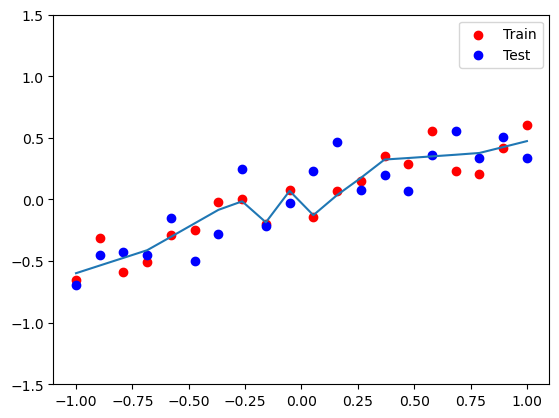

In [21]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [22]:
## above we can see that the model is trying to capture very pattern in dataset every minute pattern but it lead to overfitting so we use here dropout 

In [23]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])


In [24]:
drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False,callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

In [26]:
train_mse=model_2.evaluate(X_train,y_train,verbose=0)
test_mse=model_2.evaluate(X_test,y_test,verbose=0)
print(f"train_mse{train_mse}")
print(f"test_mse{test_mse}")

train_mse[0.01034022681415081, 0.01034022681415081]
test_mse[0.037541672587394714, 0.037541672587394714]


In [27]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


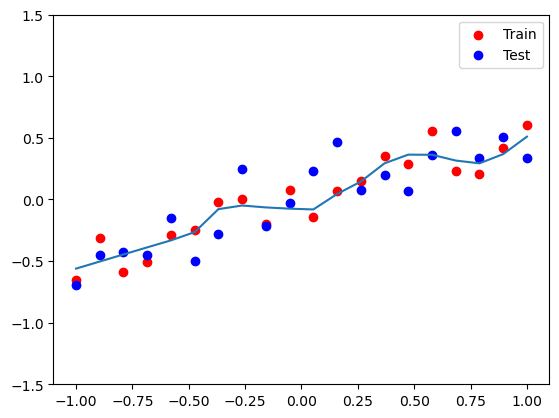

In [28]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
'''Now what is happen here when we dropout the some nodes the overfitiing is reduced
   here the model is not try to capture every minute details of the dataset so when